In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
#import data
df= pd.read_csv('cars (dataset for k means).csv')


In [44]:
x = df[df.columns[:-1]]
x = x.apply(pd.to_numeric, errors='coerce')
x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [46]:
#eliminating null values
for i in x.columns:
    x[i]=x[i].fillna(int(x[i].mean()))
for i in x.columns:
    print(x[i].isnull().sum())


0
0
0
0
0
0
0


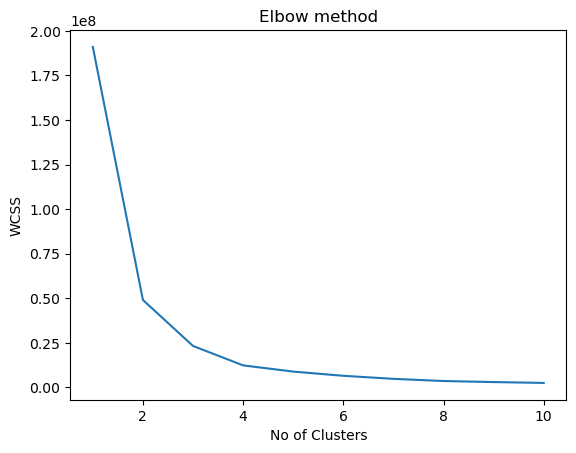

In [48]:
#using elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)   
plt.title('Elbow method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
#appllying the K-means to the cars dataset
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
x=x.values

In [68]:
print(y_kmeans)

[2 0 1 2 0 2 2 2 1 0 0 0 2 1 1 2 0 1 0 0 0 0 1 2 0 0 0 2 1 0 0 1 0 1 0 1 0
 0 2 1 2 2 1 1 1 0 2 0 0 1 2 1 1 0 2 2 1 0 0 2 1 0 1 0 2 1 0 0 0 2 1 0 0 0
 0 1 1 0 0 0 2 2 1 0 0 0 1 1 0 0 0 0 2 1 0 2 2 1 2 2 2 2 0 0 0 0 0 0 0 1 0
 1 2 0 0 2 1 1 0 2 0 0 2 1 0 0 2 0 0 0 0 0 2 1 2 2 0 1 1 1 0 0 0 0 1 1 1 1
 1 1 0 0 2 1 0 1 0 0 0 1 1 2 1 1 0 1 1 0 1 0 0 1 1 0 0 0 2 1 1 0 1 0 2 1 0
 1 1 2 2 2 0 0 2 2 2 0 0 0 0 0 0 0 1 1 0 2 0 1 2 1 1 1 0 0 1 0 0 2 0 2 1 1
 2 2 2 0 2 0 0 1 1 0 0 2 1 0 2 1 0 0 2 1 2 0 2 1 2 0 0 0 0 0 1 2 1 0 2 0 1
 1 1]


In [70]:
print(x)

[[1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 4.000e+00 8.900e+01 ... 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 8.000e+00 3.020e+02 ... 3.449e+03 1.100e+01 1.971e+03]
 ...
 [2.200e+01 6.000e+00 2.320e+02 ... 2.835e+03 1.500e+01 1.983e+03]
 [1.800e+01 6.000e+00 2.320e+02 ... 3.288e+03 1.600e+01 1.972e+03]
 [2.200e+01 6.000e+00 2.500e+02 ... 3.353e+03 1.500e+01 1.977e+03]]


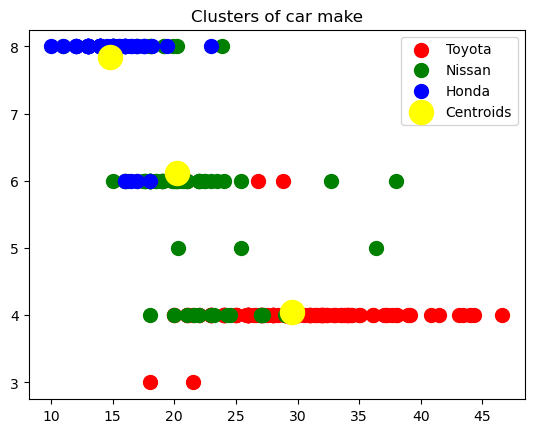

In [76]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Toyota')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Nissan')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue',label='Honda')
#put centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300,c='yellow', label='Centroids' )
plt.title('Clusters of car make')
plt.legend()
plt.show()